## Identify errors in data collection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
def encode_categorical(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns)

In [36]:
##### Load the dataset into a pandas DataFrame
df = pd.read_csv('/home/davy/Documents/jupyter/bin/salaries.csv')  # Replace with your actual file path

# Display the first few rows of the dataset
print(df.head())

# Check the data types of each column
print(df.dtypes)

   work_year experience_level employment_type           job_title  salary  \
0       2025               SE              FT  Solutions Engineer  214000   
1       2025               SE              FT  Solutions Engineer  136000   
2       2025               MI              FT       Data Engineer  158800   
3       2025               MI              FT       Data Engineer  139200   
4       2025               EN              FT       Data Engineer   90000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         214000                 US           100   
1             USD         136000                 US           100   
2             USD         158800                 AU             0   
3             USD         139200                 AU             0   
4             USD          90000                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               AU  

In [37]:
df.loc[(df["job_title"].str.contains("AI")) | (df["job_title"].str.contains("ML")), "job_title"].value_counts()[0:5]

job_title
AI Engineer       1620
AI Architect       251
AI Developer       198
MLOps Engineer     176
AI Scientist       110
Name: count, dtype: int64

In [38]:
df = df[df["job_title"] == "AI Engineer"]

In [39]:
CATEGORICAL_COLUMNS = ["experience_level", "employment_type", "company_location", "company_size"]

In [40]:
DROP_COLUMNS = ["salary_currency", "employee_residence", "job_title"]
df.drop(DROP_COLUMNS, axis = 1, inplace=True)

In [41]:
df = pd.get_dummies(df, columns=CATEGORICAL_COLUMNS, drop_first=True)

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,employment_type_PT,company_location_AT,...,company_location_QA,company_location_RO,company_location_SI,company_location_SK,company_location_TR,company_location_UA,company_location_US,company_location_ZA,company_size_M,company_size_S
251,2025,200900,200900,100,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
252,2025,133900,133900,100,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
352,2025,190000,190000,0,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
353,2025,145000,145000,0,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
571,2025,223400,223400,0,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126702,2023,136800,136800,0,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
126763,2023,60000,64781,100,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
126957,2023,300000,300000,100,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
127285,2023,227850,227850,100,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False


## Missing values?

In [2]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [4]:
# df_filled = df.fillna(df.mean())  # Fills missing numeric values with the mean of the column

## descriptive statistics and visualization to detect outliers

In [11]:
numerical_column_names = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_column_names)

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [13]:
df.select_dtypes(include=[np.number])

,work_year,salary,salary_in_usd,remote_ratio
0,2025,214000,214000,100
1,2025,136000,136000,100
2,2025,158800,158800,0
3,2025,139200,139200,0
4,2025,90000,90000,0
...,...,...,...,...
133344,2020,412000,412000,100
133345,2021,151000,151000,100
133346,2020,105000,105000,100
133347,2020,100000,100000,100


           work_year        salary  salary_in_usd   remote_ratio
count  133349.000000  1.333490e+05  133349.000000  133349.000000
mean     2024.358705  1.632833e+05  157617.272098      20.905669
std         0.680788  2.173860e+05   74288.363097      40.590044
min      2020.000000  1.400000e+04   15000.000000       0.000000
25%      2024.000000  1.060200e+05  106000.000000       0.000000
50%      2024.000000  1.470000e+05  146206.000000       0.000000
75%      2025.000000  1.990000e+05  198000.000000       0.000000
max      2025.000000  3.040000e+07  800000.000000     100.000000


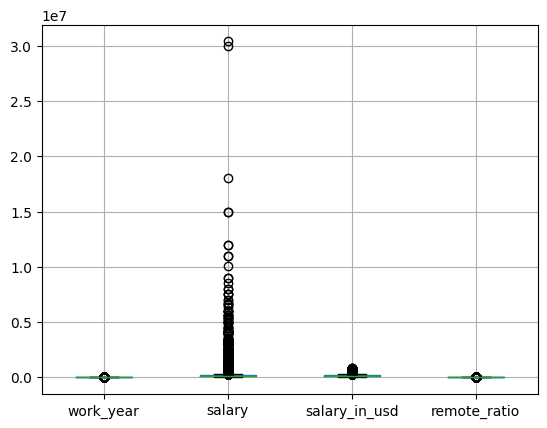

No outliers


In [20]:
# Use descriptive statistics to identify potential outliers
print(df.describe())

# Visualize data to spot outliers using box plots
df.boxplot(column=numerical_column_names)  # Replace with actual column names
plt.show()

# Calculate Z-scores to identify outliers

z_scores = np.abs(stats.zscore(df[numerical_column_names]))

# Find rows with Z-scores greater than 3
outliers = (z_scores > 3).all(axis=1)
if df[outliers].empty:
    print("No outliers")
else:
    df[outliers]

In [ ]:
# df['Column1'] = np.where(df['Column1'] > upper_limit, upper_limit, df['Column1'])

## Inconsistencies

In [ ]:
# Check for unique values in categorical columns to identify inconsistencies
# print(df['CategoryColumn'].unique())  # Replace with actual column name

In [21]:
# Use value counts to identify unusual or erroneous entries
print(df['company_location'].value_counts())

company_location
US    119641
CA      5239
GB      3719
AU       522
NL       404
       ...  
AD         1
QA         1
MU         1
OM         1
MD         1
Name: count, Length: 95, dtype: int64


In [23]:
# Check numeric columns for impossible values (e.g., negative ages)
print(df[df['salary'] < 0])

Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


## Data entry errors

In [ ]:
df['CategoryColumn'] = df['CategoryColumn'].str.strip().str.lower().replace({'misspelled': 'correct'})  # Example replacement

In [ ]:
df['Age'] = np.where(df['Age'] < 0, np.nan, df['Age'])  # Replace negative ages with NaN

# Consistency checks

In [ ]:
# Cross-validate data consistency between related columns
df['Total'] = df['Part1'] + df['Part2']  # Replace with actual column names
inconsistent_rows = df[df['Total'] != df['ExpectedTotal']]  # Replace with the actual column for the expected total
print(inconsistent_rows)

# Check for duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

In [ ]:
df_no_duplicates = df.drop_duplicates()